<a href="https://colab.research.google.com/github/khalida-mujahid/ML-practice/blob/master/batch9_lectue6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = load_iris()
X = data.data
y = data.target

In [0]:
X.shape

(150, 4)

In [0]:
X = X[:, 1:3]

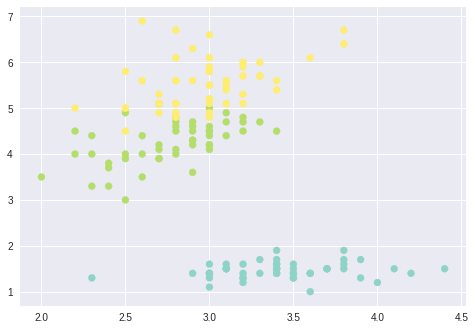

In [0]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.Set3)
plt.show()

In [0]:
clf = DecisionTreeClassifier(max_depth = 2)

In [0]:
clf = LogisticRegression()

In [0]:
X.shape

(150, 2)

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
pf = PolynomialFeatures(5)
X_p = pf.fit_transform(X)

In [0]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

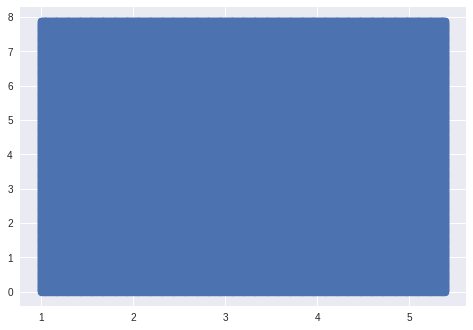

In [0]:
plt.scatter(xx,yy)

In [0]:
xx.ravel().shape

(347600,)

In [0]:
Z =clf.predict((np.c_[xx.ravel(), yy.ravel()]))

In [0]:
Z = Z.reshape(xx.shape)

In [0]:
cmap = ['red', 'green', 'blue']
colors = [cmap[i] for i in y]

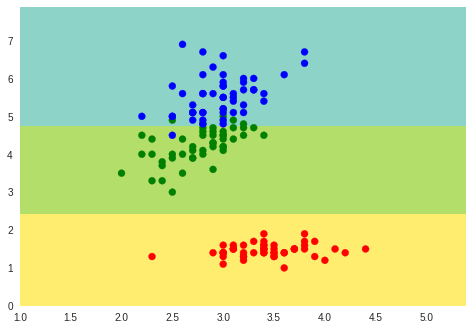

In [0]:
plt.contourf(xx,yy,Z, cmap = plt.cm.Set3_r)
plt.scatter(X[:,0], X[:,1], c=colors)
plt.show()

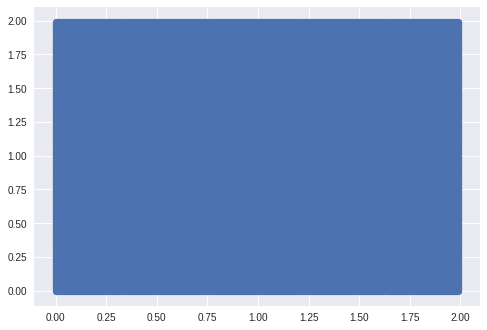

In [0]:
plt.scatter(aa,bb)
plt.show()

In [0]:
from sklearn.tree import export_graphviz

In [0]:
export_graphviz(clf, out_file='tree.dot', 
                feature_names = data.feature_names[1:3],
                class_names = data.target_names,
                rounded = True,
                filled = True)

In [0]:
!dot -Tpng tree.dot -o tree.png

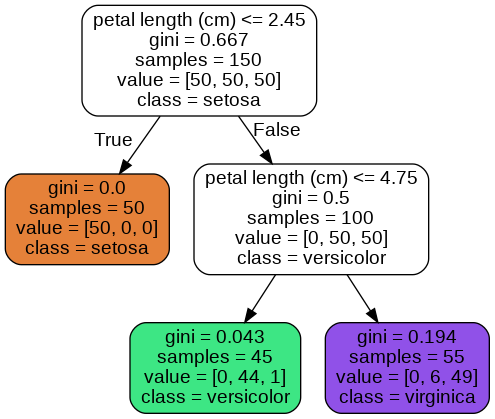

In [0]:
import IPython
IPython.display.Image('/content/tree.png')

In [0]:
''' Prediction

F = W0 + W1*X1 + W2*X2
S = 1/(1 + e^-z)

Z = S(F)

Z ---> 0-1

Loss Function
C(p,y) = -y log(p) + (1-y)(log(1-p))

Gradient Calculation
==> -y * (1-p) + (1-y) *(p)
==> error = (y-p)

Weights update

W0 = W0 - alpha * error
W1 = W1 - alpha * error * X1
W2 = W2 - alpha * error * X2
'''